# **Name : Vedant Vijay Kharkar**

# **The Spark Foundation, GRIP January 22**

# Data Science & Business Analytics Intern

# Task 1 : Prediction Using Supervised ML

# Aim : Predict the percentage of student based on the no. of study hours.



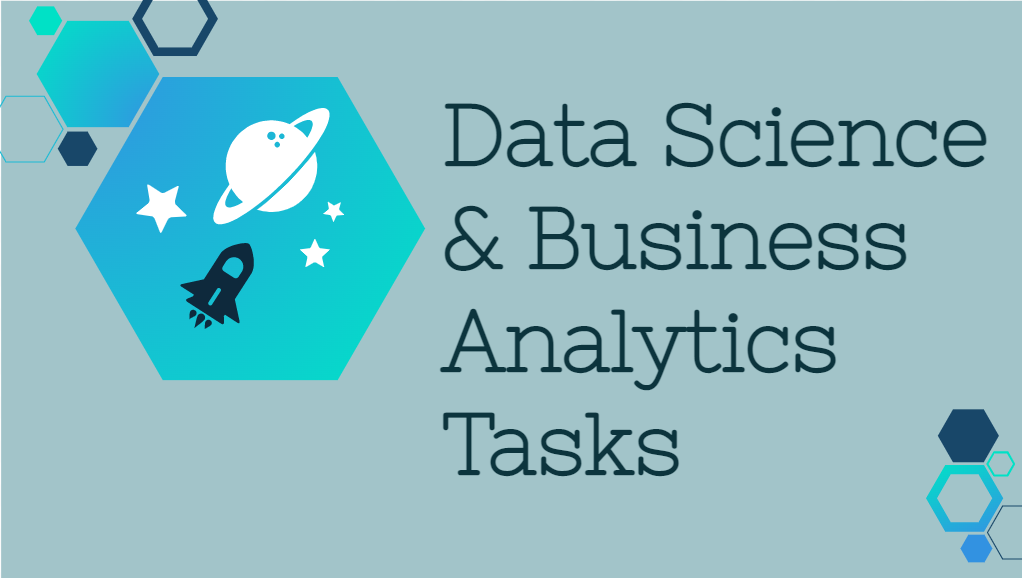

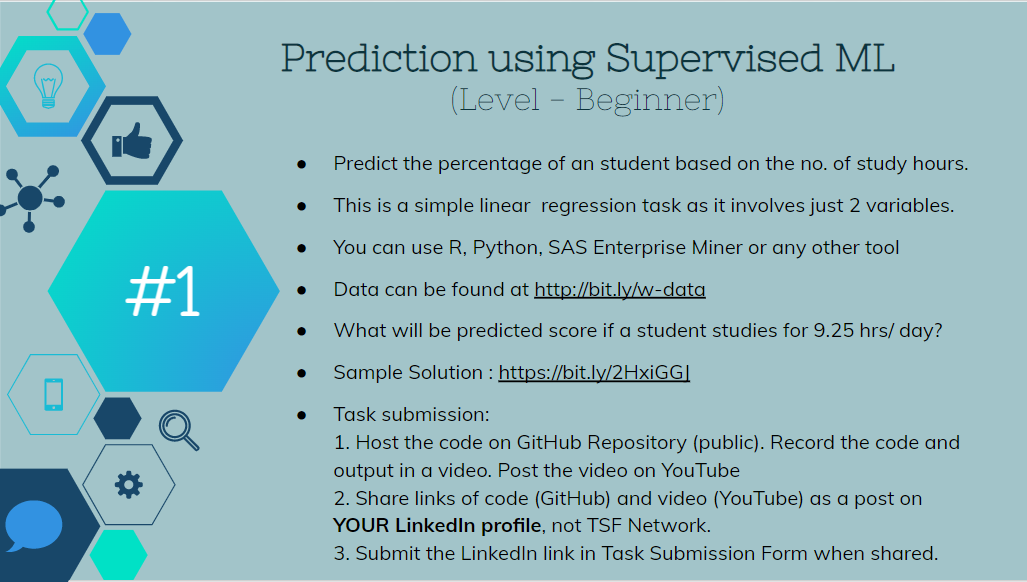

# Importing the Dependencies

In [ ]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
from sklearn.model_selection import train_test_split  
from sklearn import metrics 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

# Reading data from Remote Link


In [ ]:
url ="http://bit.ly/w-data"

# Loading the Diabetes Dataset into Pandas Dataframe
data = pd.read_csv(url)
print("Data imported successfully")

Data imported successfully


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [ ]:
# Printing First 5 Rows Of The Data
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
# Printing Last 5 Rows Of The Dataset
data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [ ]:
# No. of Rows & Columns in the Dataset
data.shape

(25, 2)

In [ ]:
# Statistical Measures Of Dataset
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


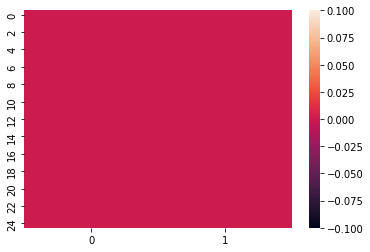

In [ ]:
# check if any null value is present
import seaborn as sns
c = sns.heatmap(data.isnull().values)

### No Null Values Are Present

In [ ]:
# Check how many other missing(zero) values
print("total number of rows : {0}".format(len(data)))
print("number of missing Values in Hours: {0}".format(len(data.loc[data['Hours'] == 0])))
print("number of missing Values in Scores: {0}".format(len(data.loc[data['Scores'] == 0])))

total number of rows : 25
number of missing Values in Hours: 0
number of missing Values in Scores: 0


## **Plotting the distribution of scores**

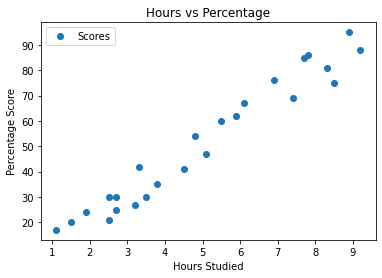

In [ ]:
data.plot(x='Hours',y='Scores',style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

### From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

## **Train Test Split**

In [ ]:
# Separating The Data and Labels
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0) 

### Dataset is successfully Splitted into Training Data(80%) and Testing Data(20%)

# **Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("The Model is now Trained !!!")

The Model is now Trained !!!


# **Regressor Line For Test Data**

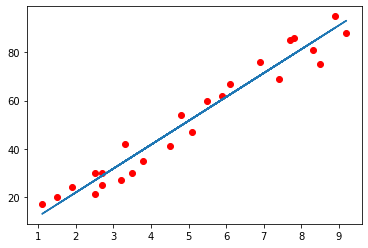

In [ ]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y,color='red')
plt.plot(X, line,);
plt.show()

### Red Scatter Points are the Test Data Points


### Now that we have trained our algorithm, it's time to make some predictions.

In [ ]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the score

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


## **Test Vs Training Score**

In [ ]:
print("Test Score")
print(regressor.score(X_test,y_test))
print("Training Score")
print(regressor.score(X_train,y_train))

Test Score
0.9454906892105354
Training Score
0.9515510725211552


In [ ]:
# Comparing Actual vs Predicted
data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
data

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


## **Plotting The predicted values against original values**

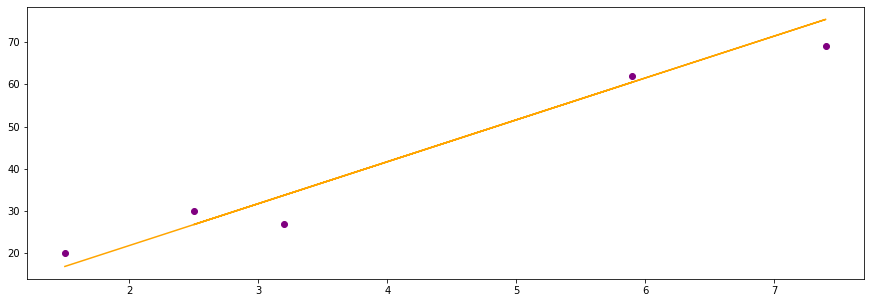

In [ ]:
plt.figure(figsize=(15,5))
plt.scatter(X_test,y_test,color="purple")
plt.plot(X_test,y_pred,color="orange")

# **Lets make predictions!!**

In [ ]:
# You can also test with your own data
hours = [8.9]
own_pred = regressor.predict([hours])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [8.9]
Predicted Score = 90.2230027191506


## **Evaluating the model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. 

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error :', metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,y_pred))) 

Mean Absolute Error: 4.183859899002982
Mean Squared Error : 21.598769307217456
Root Mean Squared Error: 4.647447612100373
